# WeatherPy
----


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set empty lists to hold information
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
found_cities = []

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL"
query_url = f"{url}appid={api_key}&units={units}&q="

# Set count to iterate over and print initial statements
records = 1
sets = 1

print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through list of cities and perform a request for data
for city in cities:
    
    # Create search query, make request, and store in json
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    # Try to pull data and print that it was successful
    try:
        print(f"Processing Record {records} of Set {sets} | {city}")
        
        #Add data to lists
        found_cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping ...")
    
    # Iterate records and sets
    records += 1
    
    if records == 50:
        records = 0
        sets += 1
    
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping ...
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | sept-iles
Processing Record 5 of Set 1 | ahipara
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | springbok
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | samusu
City not found. Skipping ...
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | poum
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | haines junction
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | dikson
Processing Record 2

Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | bowen
Processing Record 42 of Set 4 | varnamo
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | magadan
Processing Record 45 of Set 4 | genhe
Processing Record 46 of Set 4 | marsh harbour
Processing Record 47 of Set 4 | laredo
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | koumra
Processing Record 0 of Set 5 | jahrom
City not found. Skipping ...
Processing Record 1 of Set 5 | duarte
Processing Record 2 of Set 5 | shimoda
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | san andres
Processing Record 5 of Set 5 | dolbeau
City not found. Skipping ...
Processing Record 6 of Set 5 | banda
Processing Record 7 of Set 5 | dong xoai
Processing Record 8 of Set 5 | ruatoria
City not found. Skipping ...
Processing Record 9 of Set 5 | qasigiannguit
Processing Record 10 of Set 5 | paita
Processing Record 11 of Set 5 | nizhneyansk
City not found. Skipping ...
Proce

Processing Record 25 of Set 8 | ponta do sol
Processing Record 26 of Set 8 | manavalakurichi
Processing Record 27 of Set 8 | margate
Processing Record 28 of Set 8 | lata
Processing Record 29 of Set 8 | hervey bay
Processing Record 30 of Set 8 | seymchan
Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | blackpool
Processing Record 33 of Set 8 | gamba
Processing Record 34 of Set 8 | belmonte
Processing Record 35 of Set 8 | port blair
Processing Record 36 of Set 8 | moose factory
Processing Record 37 of Set 8 | zhuhai
Processing Record 38 of Set 8 | mende
Processing Record 39 of Set 8 | labutta
City not found. Skipping ...
Processing Record 40 of Set 8 | majholi
Processing Record 41 of Set 8 | tara
Processing Record 42 of Set 8 | tottori
Processing Record 43 of Set 8 | hede
Processing Record 44 of Set 8 | henties bay
Processing Record 45 of Set 8 | aginskoye
Processing Record 46 of Set 8 | nanortalik
Processing Record 47 of Set 8 | yarim
Processing Record 48 of Se

Processing Record 14 of Set 12 | baruun-urt
Processing Record 15 of Set 12 | halalo
City not found. Skipping ...
Processing Record 16 of Set 12 | russell
Processing Record 17 of Set 12 | mayskiy
Processing Record 18 of Set 12 | araouane
Processing Record 19 of Set 12 | toliary
City not found. Skipping ...
Processing Record 20 of Set 12 | kailua
Processing Record 21 of Set 12 | anloga
Processing Record 22 of Set 12 | san juan
Processing Record 23 of Set 12 | voznesenskoye
Processing Record 24 of Set 12 | guanica
Processing Record 25 of Set 12 | kribi
Processing Record 26 of Set 12 | pierre
Processing Record 27 of Set 12 | ramgarh
Processing Record 28 of Set 12 | koupela
Processing Record 29 of Set 12 | adrar
Processing Record 30 of Set 12 | bonoua
Processing Record 31 of Set 12 | cabra
Processing Record 32 of Set 12 | dolores
Processing Record 33 of Set 12 | oudtshoorn
Processing Record 34 of Set 12 | dzilam gonzalez
Processing Record 35 of Set 12 | mackay
Processing Record 36 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [87]:
# Create dictionary

weather_dict = {
    "City" : found_cities,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
}

# Create dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

#Export dataframe to csv
weather_data.to_csv("weater_data.csv")

In [8]:
# Generate and view summary statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,20.814723,13.782266,70.412596,68.835466,56.787934,8.280201,1.660327e+09
std,33.446615,93.546497,14.988309,21.993472,36.375116,5.724714,4.116808e+02
min,-54.800000,-179.166700,31.440000,1.000000,0.000000,0.000000,1.660326e+09
25%,-5.159750,-69.697150,59.205000,55.000000,20.000000,3.950000,1.660326e+09
50%,23.500000,14.040000,74.340000,74.000000,66.000000,7.140000,1.660327e+09
75%,49.591650,97.825000,80.980000,85.000000,93.000000,10.750000,1.660327e+09
max,78.218600,179.316700,112.750000,100.000000,100.000000,36.780000,1.660327e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
No humidity outliers were present. That is, all humidity values were less than 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

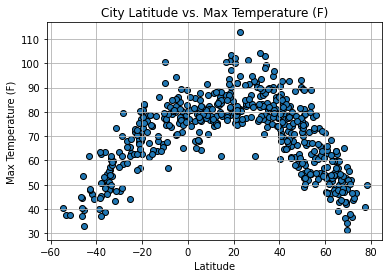

In [73]:
# Generate scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolors = 'black')
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

## Latitude vs. Temperature Plot Analysis

This plot is analyzing max temperature in Farenheit for cities at various distances from the equator. It shows what is generally expected, temperatures decrease as you move further away from the equator.

## Latitude vs. Humidity Plot

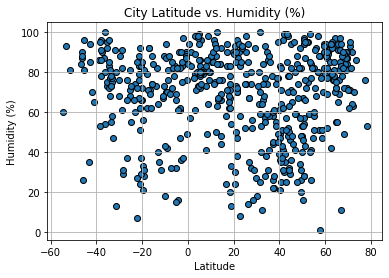

In [74]:
# Generate scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolors = 'black')
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Humidity Plot Analysis

This plot is analyzing humidity for cities at various distances from the equator. It shows no discernible relationship between latitude and humidity.

## Latitude vs. Cloudiness Plot

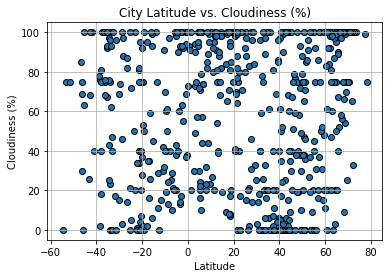

In [75]:
# Generate scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolors = 'black')
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Cloudiness Plot Analysis

This plot is analyzing cloudiness for cities at various distances from the equator. It shows no discernible relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

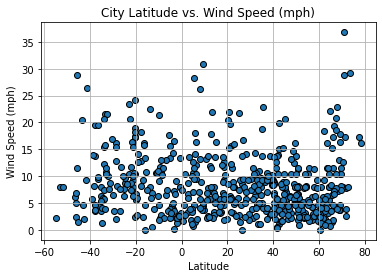

In [76]:
# Generate scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolors = 'black')
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Latitude_vs_Wind_Speed.png")
plt.show()

## Latitude vs. Wind Speed Plot Analysis

This plot is analyzing wind speed for cities at various distances from the equator. It shows no discernible relationship between latitude and wind speed.

## Linear Regression

In [27]:
# Pull out cities in Northern Hemisphere and add them to a new dataframe
northern_hemisphere_df = weather_data.loc[weather_data["Lat"] >= 0]
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.4210,-121.4238,85.96,55,0,9.22,US,1660326246
1,Ribeira Grande,38.5167,-28.7000,81.00,74,20,13.80,PT,1660326249
2,Sept-Îles,50.2001,-66.3821,70.05,67,20,13.80,CA,1660326061
8,Nome,64.5011,-165.4064,48.27,93,100,8.05,US,1660326260
11,Khatanga,71.9667,102.5000,43.59,63,33,7.72,RU,1660326265


In [28]:
# Pull out cities in Southern Hemisphere and add them to a new dataframe
southern_hemisphere_df = weather_data.loc[weather_data["Lat"] < 0]
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Ahipara,-35.1667,173.1667,50.02,73,92,6.38,NZ,1660326251
4,Punta Arenas,-53.1500,-70.9167,37.42,93,75,8.05,CL,1660326158
5,Springbok,-29.6643,17.8865,47.61,88,74,3.51,ZA,1660326254
6,Bredasdorp,-34.5322,20.0403,48.04,83,43,5.57,ZA,1660326255
7,Ancud,-41.8697,-73.8203,46.31,70,100,9.22,CL,1660326258


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.4874947035229656


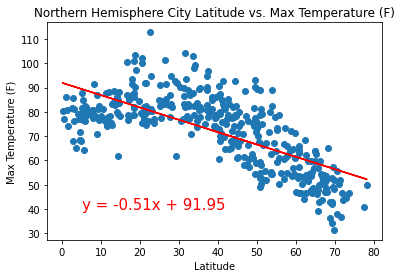

In [77]:
# Generate scatter plot, regression line, and regression equation
north_temp_x_values = northern_hemisphere_df["Lat"]
north_temp_y_values = northern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_temp_x_values, north_temp_y_values)
north_temp_regress_values = north_temp_x_values * slope + intercept
north_temp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_temp_x_values, north_temp_y_values)
plt.plot(north_temp_x_values, north_temp_regress_values, "r-")
plt.annotate(north_temp_line_eq, (5,40), fontsize = 15, color = "red")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Northern_Hemisphere_Temperature_Regression.png")
plt.show()

#### Northern Hemisphere - Max Temp Analysis

The regression analysis suggests that there is a moderate negative relationship. This makes sense as it generally gets colder as you get further away from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.6980824384891084


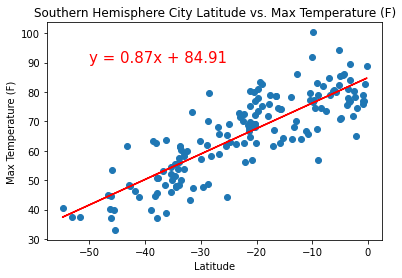

In [78]:
# Generate scatter plot, regression line, and regression equation
south_temp_x_values = southern_hemisphere_df["Lat"]
south_temp_y_values = southern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_temp_x_values, south_temp_y_values)
south_temp_regress_values = south_temp_x_values * slope + intercept
south_temp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_temp_x_values, south_temp_y_values)
plt.plot(south_temp_x_values, south_temp_regress_values, "r-")
plt.annotate(south_temp_line_eq, (-50,90), fontsize = 15, color = "red")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Southern_Hemisphere_Temperature_Regression.png")
plt.show()

#### Southern Hemisphere - Max Temp Analysis

The regression analysis suggests that there is a moderate to strong positive relationship. This makes sense as it generally gets warmer as you get closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 2.3973514524658e-05


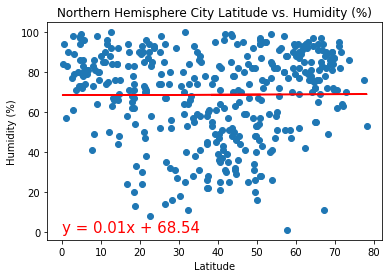

In [79]:
# Generate scatter plot, regression line, and regression equation
north_humidity_x_values = northern_hemisphere_df["Lat"]
north_humidity_y_values = northern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_humidity_x_values, north_humidity_y_values)
north_humidity_regress_values = north_humidity_x_values * slope + intercept
north_humidity_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_humidity_x_values, north_humidity_y_values)
plt.plot(north_humidity_x_values, north_humidity_regress_values, "r-")
plt.annotate(north_humidity_line_eq, (0,0), fontsize = 15, color = "red")
plt.title("Northern Hemisphere City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Northern_Hemisphere_Humidity_Regression.png")
plt.show()

#### Northern Hemisphere - Humidity Analysis

The regression analysis suggests that there is no discernible correlation between humidity and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.026519800498233635


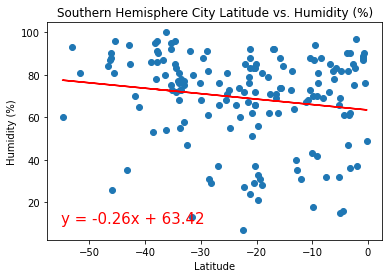

In [80]:
# Generate scatter plot, regression line, and regression equation
south_humidity_x_values = southern_hemisphere_df["Lat"]
south_humidity_y_values = southern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_humidity_x_values, south_humidity_y_values)
south_humidity_regress_values = south_humidity_x_values * slope + intercept
south_humidity_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_humidity_x_values, south_humidity_y_values)
plt.plot(south_humidity_x_values, south_humidity_regress_values, "r-")
plt.annotate(south_humidity_line_eq, (-55,10), fontsize = 15, color = "red")
plt.title("Southern Hemisphere City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Southern_Hemisphere_Humidity_Regression.png")
plt.show()

#### Southern Hemisphere - Humidity Analysis

Regression analysis suggests that there is a very weak negative correlation between humidity and latitude in the Southern Hemisphere. The relationship is far too weak to make any reasonable predictions.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 4.5041308189966596e-07


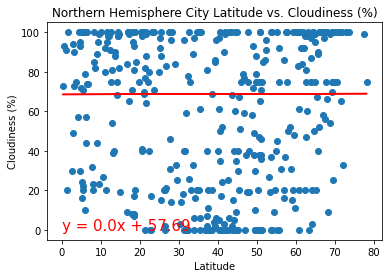

In [81]:
# Generate scatter plot, regression line, and regression equation
north_cloudiness_x_values = northern_hemisphere_df["Lat"]
north_cloudiness_y_values = northern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cloudiness_x_values, north_cloudiness_y_values)
north_cloudiness_regress_values = north_cloudiness_x_values * slope + intercept
north_cloudiness_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cloudiness_x_values, north_cloudiness_y_values)
plt.plot(north_humidity_x_values, north_humidity_regress_values, "r-")
plt.annotate(north_cloudiness_line_eq, (0,0), fontsize = 15, color = "red")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Northern_Hemisphere_Cloudiness_Regression.png")
plt.show()

#### Northern Hemisphere - Cloudiness Analysis

The regression analysis suggests that there is no discernible correlation between cloudiness and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.004228466307651749


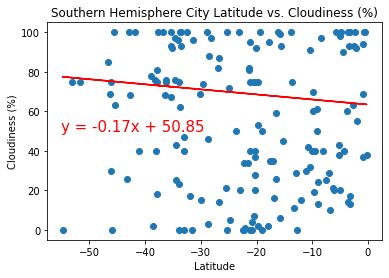

In [82]:
# Generate scatter plot, regression line, and regression equation
south_cloudiness_x_values = southern_hemisphere_df["Lat"]
south_cloudiness_y_values = southern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cloudiness_x_values, south_cloudiness_y_values)
south_cloudiness_regress_values = south_cloudiness_x_values * slope + intercept
south_cloudiness_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cloudiness_x_values, south_cloudiness_y_values)
plt.plot(south_humidity_x_values, south_humidity_regress_values, "r-")
plt.annotate(south_cloudiness_line_eq, (-55,50), fontsize = 15, color = "red")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Southern_Hemisphere_Cloudiness_Regression.png")
plt.show()

#### Southern Hemisphere - Humidity Analysis

Regression analysis suggests that there is a very weak negative correlation between cloudiness and latitude in the Southern Hemisphere. The relationship is far too weak to make any reasonable predictions.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.00011669449598697032


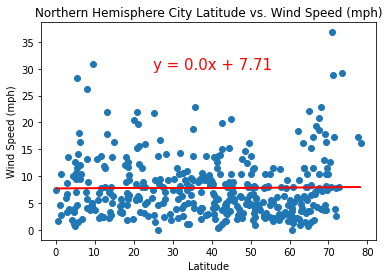

In [83]:
# Generate scatter plot, regression line, and regression equation
north_wind_x_values = northern_hemisphere_df["Lat"]
north_wind_y_values = northern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_wind_x_values, north_wind_y_values)
north_wind_regress_values = north_wind_x_values * slope + intercept
north_wind_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_wind_x_values, north_wind_y_values)
plt.plot(north_wind_x_values, north_wind_regress_values, "r-")
plt.annotate(north_wind_line_eq, (25,30), fontsize = 15, color = "red")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Northern_Hemisphere_Wind_Speed_Regression.png")
plt.show()

#### Northern Hemisphere - Wind Speed Analysis

The regression analysis suggests that there is no discernible correlation between wind speed and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.016572926799305766


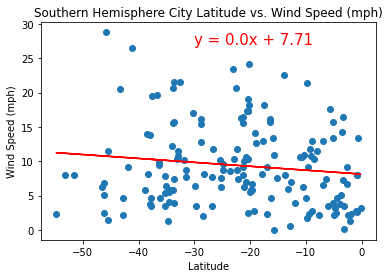

In [84]:
# Generate scatter plot, regression line, and regression equation
south_wind_x_values = southern_hemisphere_df["Lat"]
south_wind_y_values = southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_wind_x_values, south_wind_y_values)
south_wind_regress_values = south_wind_x_values * slope + intercept
south_wind_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_wind_x_values, south_wind_y_values)
plt.plot(south_wind_x_values, south_wind_regress_values, "r-")
plt.annotate(north_wind_line_eq, (-30,27), fontsize = 15, color = "red")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared value is: {rvalue ** 2}")
plt.savefig("Southern_Hemisphere_Wind_Speed_Regression.png")
plt.show()

#### Southern Hemisphere - Wind Speed Analysis

The regression analysis suggests that there is no discernible correlation between wind speed and latitude in the Southern Hemisphere.